## Síntese de compensadores de avanço e atraso de fase pelo método do lugar das raízes



In [1]:
# !pip install matplotlib ipympl jupyter

In [50]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import sympy as sp
import control as ct

s = ct.tf([1, 0], [1])

In [3]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Compensador de avanço de fase

Um *compensador de avanço de fase* tem uma função de transferência da forma:
$$ G_c(s) = \frac{1 + Ts}{1 + \alpha Ts} = \frac{1}{\alpha} \frac{s + \frac{1}{T}}{s + \frac{1}{\alpha T}} = \frac{1}{\alpha} \frac{s - z_c}{s - p_c}
\quad \text{com} \quad
0 < \alpha <1
$$

Tal compensador adiciona ao sistema um polo, em $\displaystyle s = p_c = -\frac{1}{\alpha T}$ e um zero em $\displaystyle s = z_c = -\frac{1}{T}$, com $p_c < z_c$, sem alterar o valor de $\displaystyle K_m = \lim_{s \to 0} s^m L(s)$ do sistema.

Observando sua *resposta em frequência*, nota-se que o *avanço de fase* ocorre em todo o espectro de frequência, tendo seu valor máximo dado por:
$$ \phi_m = \arcsin\left(\frac{1-\alpha}{1+\alpha} \right)
\quad \text{em} \quad
\omega_m T = \frac{1}{\sqrt{\alpha}} 
$$
Em termos de *ganho*, este tipo de compensador tem características de um filtro *passa-altas*: 
* não há praticamente nenhum aumento no ganho para $\omega T \ll 1$;
* o ganho é amplificado em $\displaystyle +10 \ |\log_{10} \alpha| \ \text{dB}$ para $\displaystyle \omega_m T = \frac{1}{\sqrt{\alpha}} $;
* o ganho é amplificado em $\displaystyle +20 \ |\log_{10} \alpha| \ \text{dB}$ para $\displaystyle \omega T \gg \frac{1}{\alpha}$.



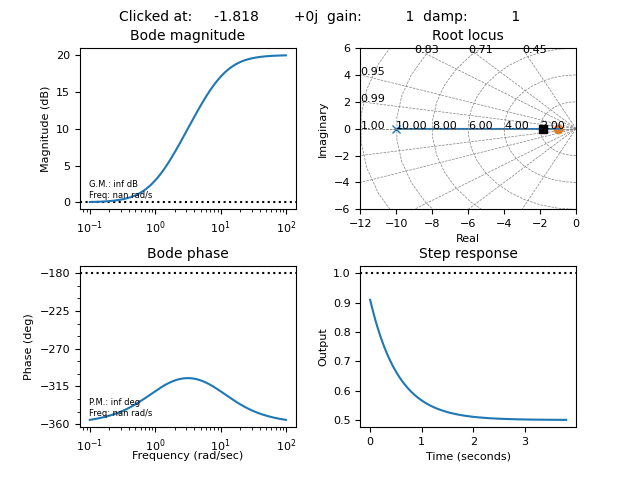

In [4]:
plt.ion()  # ativar o modo interativo
ct.sisotool((1+s)/(1 + 0.1*s), xlim_rlocus=(-12, 0), ylim_rlocus=(-6, 6),
            rlocus_grid=True, dB=True)
plt.draw()  # desenhar a janela interativa

#### 1.1. Síntese de um compensador de avanço de fase

Consideremos novamente a função de transferência de malha aberta *do exemplo A-6-19 do livro* 
> OGATA, K. (2001) Modern Control Engineering, 4th ed., Pearson.

que modela *piloto automático para o modo longitudinal (pitch) de um avião*:

\begin{align*}
    L(s) = G(s)H(s) = \frac{K(s+a)}{s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)} = K \frac{N(s)}{D(s)}
\end{align*}
com:
\begin{align*}
    & N(s) = (s+a) \\
    & D(s) = s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)
\end{align*}

Adote-se $a=b=1$, $\zeta=0.5$ e $\omega_n=4$:

\begin{align*}
   L(s) = \frac{K(s+1)}{s(s-1)(s^2 + 4s + 16)}
\end{align*}

Neste caso, o sistema é do tipo 1, tendo um zero em $z_1 = -1$ e quatro polos em $p_0=0$ (multiplicidade algébrica 1), $p_1=+1$ e $p_{2,3}=-2 \pm 2\sqrt{3} \mathsf{j}$.



In [54]:
K_l0 = 37.2428000000000
L_0 = ct.tf([0,0,37.2428000000000,44.1077252817023,199.004232783142,56.5658583247018,49.9538633901049],[1,1.19999999999997,6.06999999999997,-2.30399999999996,-3.20259999999930,-2.76339999999981,0])/K_l0
s_s = sp.symbols('s')
N_s = sp.Poly(np.poly(ct.zeros(L_0)), s_s)
D_s = sp.Poly(np.poly(ct.poles(L_0)), s_s)
N = ct.tf(np.poly(ct.zeros(L_0)),[1])
D = ct.tf(np.poly(ct.poles(L_0)),[1])
N/D

TransferFunction(array([1.        , 1.18432892, 5.34342833, 1.51884011, 1.34130257]), array([ 1.    ,  1.2   ,  6.07  , -2.304 , -3.2026, -2.7634,  0.    ]))

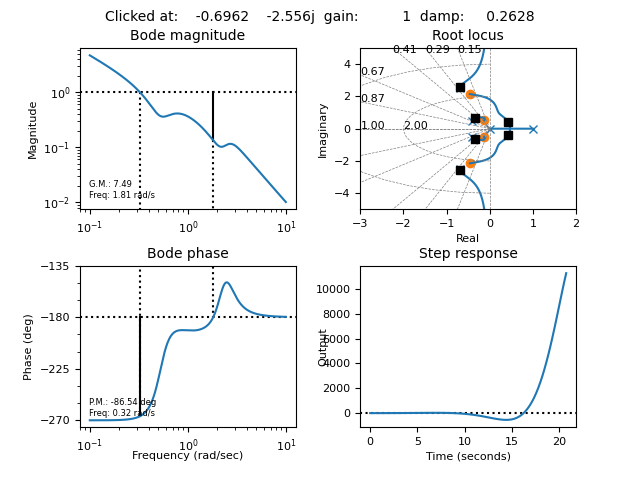

Clicked at    -0.2026    +1.963j gain      11.51 damp     0.1027
Clicked at   -0.05264    +1.862j gain      8.295 damp    0.02826
Clicked at   -0.08618    +1.961j gain      9.675 damp     0.0439
Clicked at    -0.2036    +1.986j gain      12.01 damp      0.102
Clicked at    -0.2791    +2.086j gain      17.12 damp     0.1326
Clicked at    -0.2287    +2.011j gain      13.19 damp      0.113
Clicked at    -0.2724     +2.04j gain      15.55 damp     0.1324
Clicked at    -0.2362    +2.066j gain      14.51 damp     0.1136
Clicked at    -0.2227    +2.066j gain      13.96 damp     0.1072
Clicked at    -0.1956    +2.013j gain      12.32 damp     0.0967
Clicked at   -0.08722    +1.881j gain      8.783 damp    0.04632
Clicked at    -0.2949   +0.6882j gain      1.379 damp     0.3939
Clicked at    -0.2137   +0.6882j gain      1.952 damp     0.2965
Clicked at   -0.06464    +1.907j gain      8.876 damp    0.03387
Clicked at    -0.2498    +2.066j gain      15.13 damp       0.12
Clicked at    -0.2317    

In [55]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_0, xlim_rlocus=(-3, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa
plt.show()

Vamos tentar projetar um compensador de avanço de fase que leve os polos dominantes do sistema em malha fechada para a posição $\bar p_{1,2} = -0.15 \pm 0.2 \ \mathsf{j}$ 

In [274]:
clp_1 = -0.10+0.52j
(np.abs(clp_1), -np.real(clp_1)/np.abs(clp_1)) # valores de (ω_n, ζ)

(0.5295280917949491, 0.18884739365012448)

Usando a função de transferência do sistema não compensado $\displaystyle L_0(s) = \frac{N(s)}{D(s)}$ verifica-se que, para o polo $\bar p_1 = -0.4 + 1 \ \mathsf{j}$ o valor de $\phase{L_0(p_1)}$ é igual a:

In [275]:
φ_L_clp1 = np.angle(L_0(clp_1)) 
φ_L_clp1 * 180/np.pi  # exibe o resultado em graus

131.04567955857442

Ou seja, para que o polo desejado faça parte do lugar das raízes, é necessário um avanço de fase $\varphi$:

In [276]:
φ = np.pi - φ_L_clp1
φ * 180/np.pi   # exibe o resultado em graus

48.95432044142559

Uma regra prática para a alocação do zero $z_c$ e do polo $p_c$ do compensador que maximiza o valor de $\alpha$ (ou seja, maximiza o ganho em alta frequência) consiste em adotar:

\begin{align*}
& z_c = \text{Re}(\bar p_1) - \frac{\text{Im}(\bar p_1)}{\displaystyle \tan \left(\frac{\bar \psi_1 + \varphi}{2} \right)}
\\
& p_c = \text{Re}(\bar p_1) - \frac{\text{Im}(\bar p_1)}{\displaystyle \tan \left(\frac{\bar \psi_1 - \varphi}{2} \right)}
\end{align*}

com $\bar \psi_1= \phase{\bar p_1}$.

In [277]:
z_c = np.real(clp_1) - np.imag(clp_1)/np.tan(0.5 * (np.angle(clp_1) + φ))
z_c

-0.24011279961791637

In [278]:
p_c = np.real(clp_1) - np.imag(clp_1)/np.tan(0.5 * (np.angle(clp_1) - φ))
p_c

-1.1677844764885146

Assim, os valores de $T$ e $\alpha$ podem ser calculados como:
$$
T = - \frac{1}{z_c} \quad \text{e} \quad \alpha = \frac{z_c}{p_c}
$$

In [279]:
α = z_c/p_c
(- 1/z_c, α)

(4.164709259944773, 0.2056139676902769)

A nova função de transferência de malha aberta, com o compensador de avanço projetado, é dada por:
$$
L_1(s) = K_c  \underbrace{\frac{1}{\alpha} \frac{(s - z_c)}{(s - p_c)}}_{\text{avanço}} \frac{N(s)}{D(s)}
$$

O ganho $K_c$ para que $\bar p_{1,2}$ sejam efetivamente polos em malha fechada pode então ser calculado a partir da condição $L_1(\bar p_1) = -1$, ou seja:

$$
\frac{K_c}{\alpha} \left| \frac{(\bar p_1-z_c)}{(\bar p_1-p_c)} \frac{N(\bar p_1)}{D(\bar p_1)} \right| = 1
\quad \Rightarrow \quad 
K_c = \alpha \left| \frac{(\bar p_1-p_c)}{(\bar p_1-z_c)} \frac{D(\bar p_1)}{N(\bar p_1)} \right|
$$

In [280]:
L_1_1 = 1/α * (s - z_c)/(s - p_c) * N/D
L_1_1

TransferFunction(array([ 4.86348282,  6.92774786, 27.37071285, 13.62682543,  8.29707991,
        1.56635232]), array([ 1.        ,  2.36778448,  7.47134137,  4.78445177, -5.89317543,
       -6.50334656, -3.22705562,  0.        ]))

In [281]:
L_1_1(clp_1)

(-0.25026095818360594-7.235167399823568e-16j)

In [282]:
K_c = 1/np.abs(L_1_1(clp_1))
K_c

3.9958290228647733

Assim, temos o seguinte compensador de avanço:

In [283]:
G_lead = K_c/α * (s - z_c)/(s - p_c)
G_lead

TransferFunction(array([19.43364582,  4.6662671 ]), array([1.        , 1.16778448]))

Diagrama de Bode do compensador sintetizado:

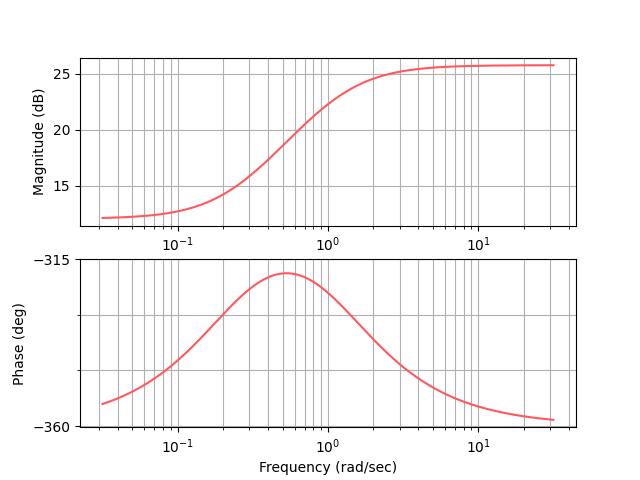

In [284]:
plt.figure()
G_lead_M, G_lead_φ, G_lead_ω = ct.bode_plot(G_lead,
                                   omega=np.logspace(-1.5, 1.5, 5001),
                                   color=cp['red'],
                                   dB=True)

Análise da função de transferência em malha aberta do sistema com compensador:

In [285]:
L_1 = G_lead * L_0
L_1

TransferFunction(array([ 723.76338439, 1030.95876335, 4073.19620324, 2027.88776086,
       1234.73709214,  233.09806944]), array([  37.2428    ,   88.1829237 ,  278.25367244,  178.18638046,
       -219.47835405, -242.20283543, -120.18458713,    0.        ]))

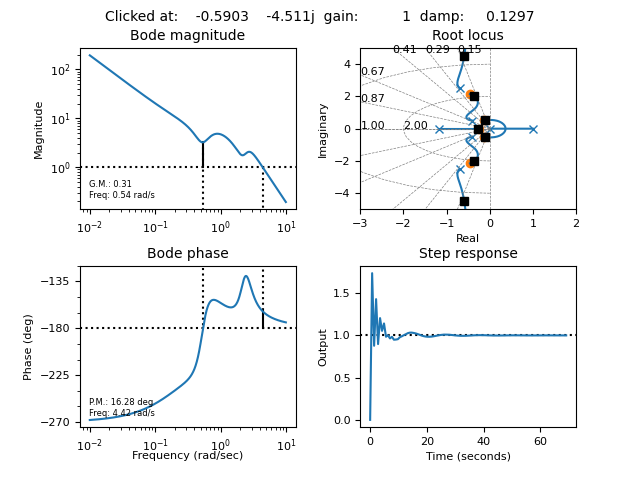

In [286]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_1, xlim_rlocus=(-3, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa

#### 1.2. Função de transferência entre referência (r) e saída (c)

In [287]:
rc_tf_lead = ct.feedback(G_lead * L_0)
rc_tf_lead

TransferFunction(array([ 723.76338439, 1030.95876335, 4073.19620324, 2027.88776086,
       1234.73709214,  233.09806944]), array([  37.2428    ,   88.1829237 , 1002.01705683, 1209.14514381,
       3853.71784919, 1785.68492543, 1114.55250501,  233.09806944]))

Frequencias naturais, fatores de amortecimento e zeros em malha fechada:

In [288]:
ω_n_cl, ζ_cl, zeros_cl = rc_tf_lead.damp()
ω_n_cl

array([4.54975518, 4.54975518, 2.03368195, 2.03368195, 0.52952809,
       0.52952809, 0.26072112])

In [289]:
ζ_cl

array([0.12973803, 0.12973803, 0.17861957, 0.17861957, 0.18884739,
       0.18884739, 1.        ])

In [290]:
zeros_cl

array([-0.59027629+4.51130204j, -0.59027629-4.51130204j,
       -0.36325539+2.00097671j, -0.36325539-2.00097671j,
       -0.1       +0.52j      , -0.1       -0.52j      ,
       -0.26072112+0.j        ])

Diagrama de Bode da função de transferência do sistema em malha fechada:

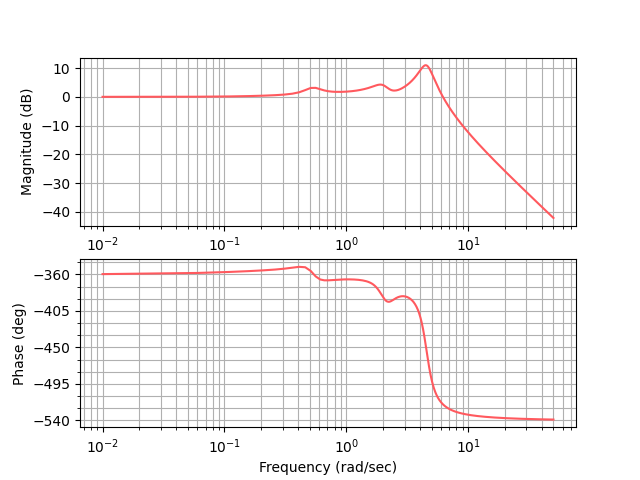

In [291]:
plt.figure()
rc_tf_M, rc_tf_φ, rc_tf_ω = ct.bode_plot(rc_tf_lead,
                                   omega=np.linspace(0.01, 50, 1001),
                                   color=cp['red'],
                                   dB=True)

#### 1.3. Função de transferência entre referência (r) e entrada de controle (u)

In [292]:
ru_tf_lead = ct.feedback(G_lead, L_0)
ru_tf_lead

TransferFunction(array([  723.76338439,  1042.30091375,  4601.78556621,  -612.67678304,
       -2718.32491497, -2556.61110499,  -480.23706136,     0.        ]), array([  37.2428    ,   88.1829237 , 1002.01705683, 1209.14514381,
       3853.71784919, 1785.68492543, 1114.55250501,  233.09806944]))

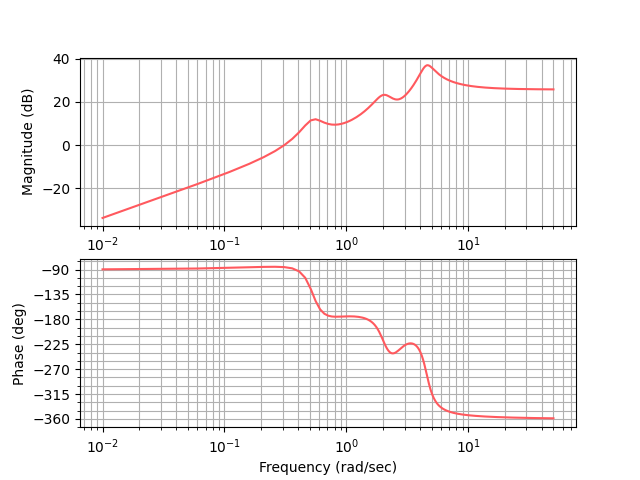

In [293]:
plt.figure()
ru_tf_M, ru_tf_φ, ru_tf_ω = ct.bode_plot(ru_tf_lead,
                                         omega=np.linspace(0.01, 50, 1001),
                                         color=cp['red'],
                                         dB=True)

#### 1.4. Resposta a degrau

C:\Users\lucap\AppData\Local\Temp\ipykernel_9436\2728710317.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (state, control_input) = plt.subplots(


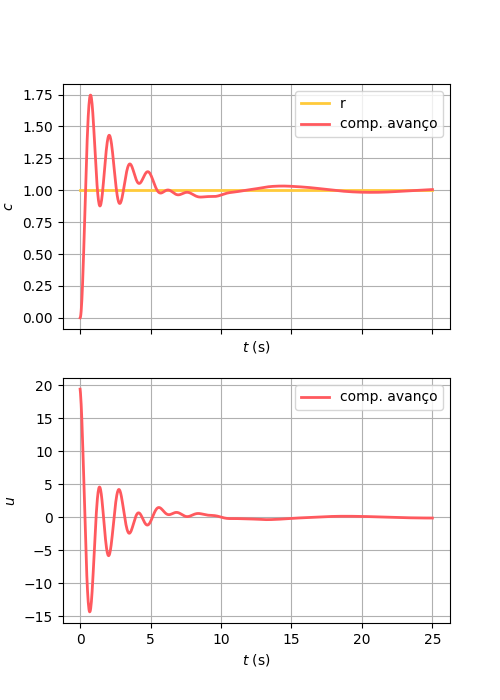

In [294]:
# simulação do sistema em MF
ts = np.linspace(0, 25, 1000)

t, y = ct.step_response(rc_tf_lead, ts)
t, u = ct.step_response(ru_tf_lead, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
state.plot(t, y,
           color=cp['red'], label=r'comp. avanço', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

control_input.plot(t, u,
           color=cp['red'], label=r'comp. avanço', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 1.5. Resposta a rampa

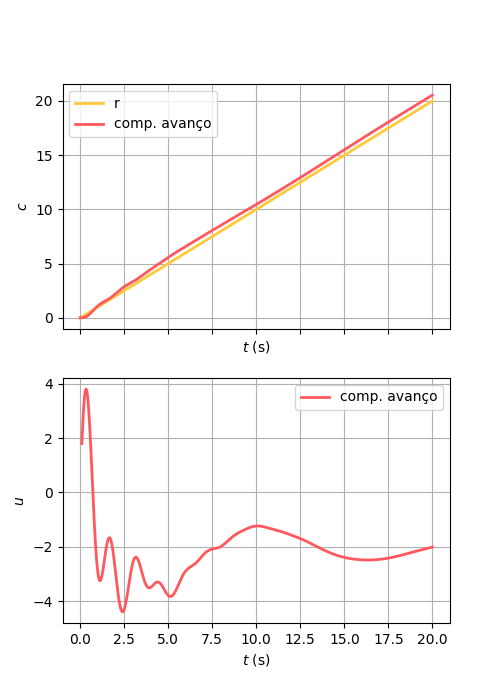

In [404]:
# simulação do sistema em MF
ts = np.linspace(0, 20, 2000)

t, y = ct.forced_response(rc_tf_lead, ts, U=ts)
t, u = ct.forced_response(ru_tf_lead, ts, U=ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, t, color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y, color=cp['red'], label='comp. avanço', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()


control_input.plot(t[10:], u[10:], color=cp['red'],
                   label='comp. avanço', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

Dado que o sistema compensado é do tipo 1, o erro em regime ao seguir uma referência do tipo rampa unitária é dado por:
$$
e_{ss} = \frac{1}{K_1}
\quad \text{com} \quad
K_1 = \lim_{s \to 0} s L(s) 
$$

In [297]:
L_1 = G_lead * L_0
L_1

TransferFunction(array([ 723.76338439, 1030.95876335, 4073.19620324, 2027.88776086,
       1234.73709214,  233.09806944]), array([  37.2428    ,   88.1829237 ,  278.25367244,  178.18638046,
       -219.47835405, -242.20283543, -120.18458713,    0.        ]))

In [298]:
K1_1 = L_1.num[0][0][-1]/L_1.den[0][0][-2]
K1_1

-1.939500521648567

In [299]:
e_ss_1 = 1/K1_1
e_ss_1

-0.5155966646247686

### 2. Compensador de atraso de fase

Um *compensador de atraso de fase* tem uma função de transferência da forma:
$$ G_g(s) = \frac{1 + Ts}{1 + \beta Ts} = \frac{1}{\beta} \frac{s + \frac{1}{T}}{s + \frac{1}{\alpha T}} = \frac{1}{\beta} \frac{s - z_g}{s - p_g}
\quad \text{com} \quad
\beta >1
$$

Tal compensador adiciona ao sistema um polo, em $\displaystyle s = p_g = -\frac{1}{\beta T}$ e um zero em $\displaystyle s = z_g = -\frac{1}{T}$, com $z_g < p_g$, sem alterar o valor de $\displaystyle K_m = \lim_{s \to 0} s^m L(s)$ do sistema.

Observando sua *resposta em frequência*, nota-se que o *atraso de fase* ocorre em todo o espectro de frequência. Em termos de *ganho*, este tipo de compensador tem características de um filtro *passa-baixas*: 
* não há praticamente nenhuma redução no ganho para $\displaystyle \omega T \ll \frac{1}{\beta}$;
* o ganho é atenuado em $\displaystyle -20 \ |\log_{10} \beta| \ \text{dB}$ para $\omega T \gg 1$.

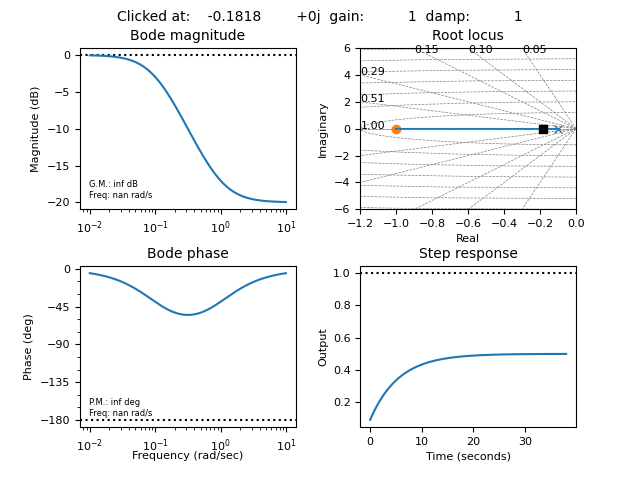

In [300]:
plt.ion()  # ativar o modo interativo
ct.sisotool((1+s)/(1 + 10*s), xlim_rlocus=(-1.2, 0), ylim_rlocus=(-6, 6),
            rlocus_grid=True, dB=True)
plt.draw()  # desenhar a janela interativa

O atraso de fase em si não é um efeito desejável (veremos adiante que *atrasos podem ser prejudiciais à estabilidade* do sistema em malha fechada). 

No entanto, a presença deste tipo de compensador torna possível aumentar o ganho $K_m$ do sistema (*reduzindo erros de acompanhamento de referência*) sem afetar de forma significativa a resposta do sistema em alta frequência. 

A configuração tipicamente escolhida para o *compensador de atraso* é um *dipolo*, ou seja, escolhem-se $z_g$ e $p_g$ com $\displaystyle \frac{z_g}{p_g} = \beta$ tais que, sendo $\bar p$ um *polo dominante* do sistema em malha fechada:
$$
\left| \bar p - z_g \right| \approx \left| \bar p - p_g \right|
\quad \Rightarrow \quad 
|G_c(\bar p)| \approx \frac{1}{\beta}
$$

Desta forma, ao inserirmos na malha de controle um compensador de atraso, podemos amplificar $K_m$ em $\beta$ vezes, reduzindo erros de acompanhamento de referência e mantendo praticamente inalterada a resposta do sistema em alta frequência. 

#### 2.1. Síntese de um compensador de atraso

Voltando ao exemplo anterior, vamos avaliar como reduzir em 10 vezes o erro de acompanhamento do sistema. 

Partimos da função de transferência em malha aberta já com o compensador de avanço:
$$
L_1 (s) = K_c \underbrace{\frac{1}{\alpha} \frac{(s - z_c)}{(s - p_c)}}_{\text{avanço}} \frac{N(s)}{D(s)}
$$
e a modificamos para a forma:
$$
L_2 (s) = \overbrace{\beta K_c}^{\text{ganho}} \underbrace{\frac{1}{\beta} \frac{(s - z_g)}{(s - p_g)}}_{\text{atraso}} \underbrace{\frac{1}{\alpha} \frac{(s - z_c)}{(s - p_c)}}_{\text{avanço}} \frac{N(s)}{D(s)}
$$

Considere as posições dos polos dominantes em malha fechada:

(array([-0.59027629+4.51130204j, -0.59027629-4.51130204j,
        -0.36325539+2.00097671j, -0.36325539-2.00097671j,
        -0.1       +0.52j      , -0.1       -0.52j      ,
        -0.26072112+0.j        ]),
 array([-0.46132808+2.14735178j, -0.46132808-2.14735178j,
        -0.13083638+0.51081592j, -0.13083638-0.51081592j,
        -0.2401128 +0.j        ]))

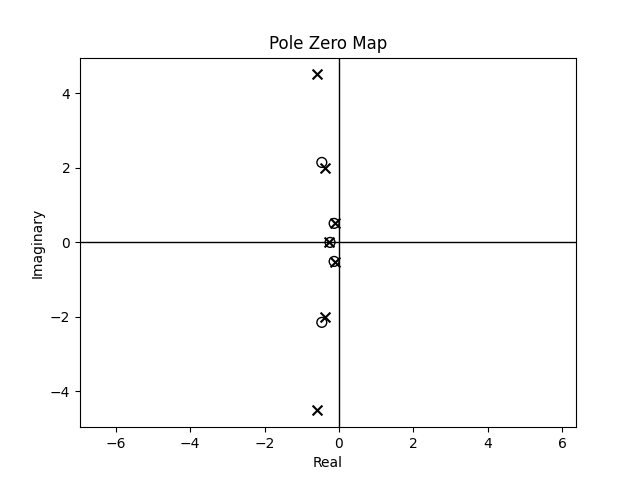

In [301]:
plt.figure()
ct.pzmap(rc_tf_lead)

Assim, escolhemos o *dipolo* com:

In [406]:
z_g = -0.03
p_g = -0.003
β = z_g/p_g
β

10.0

E obtemos a nova função de transferência em malha aberta:

In [407]:
L_2 = L_1 * (s - z_g)/(s - p_g)
L_2

TransferFunction(array([ 723.76338439, 1052.67166488, 4104.12496614, 2150.08364696,
       1295.57372497,  270.1401822 ,    6.99294208]), array([  37.2428    ,   88.2946521 ,  278.51822121,  179.02114148,
       -218.94379491, -242.86127049, -120.91119564,   -0.36055376,
          0.        ]))

Para a qual obtemos o novo valor de $K_1$ para $L_2$ ($\beta = 10$ vezes superior ao obtido para $L_1$):

In [408]:
K1_2 = L_2.num[0][0][-1]/L_2.den[0][0][-2]
K1_2

-19.395005216485668

Lugar das raízes da função de transferência $L_2(s)$:

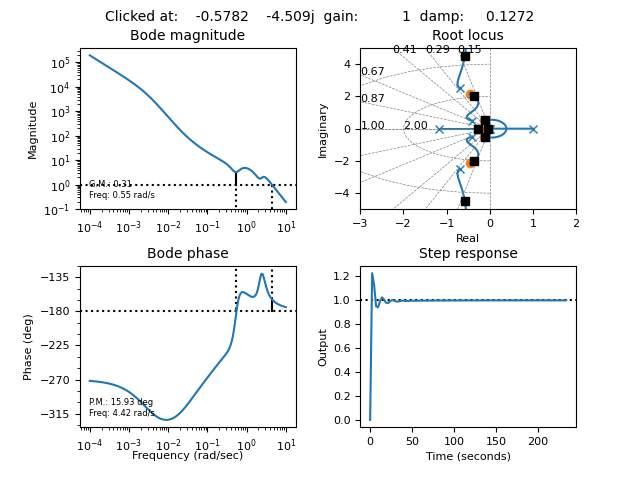

In [409]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_2, xlim_rlocus=(-3, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa

O compensador completo pode ser descrito como:

In [410]:
G_ll = G_lead * (s - z_g)/(s - p_g)
G_ll

TransferFunction(array([19.43364582,  5.24927648,  0.13998801]), array([1.        , 1.17078448, 0.00350335]))

Diagrama de Bode do compensador completo:

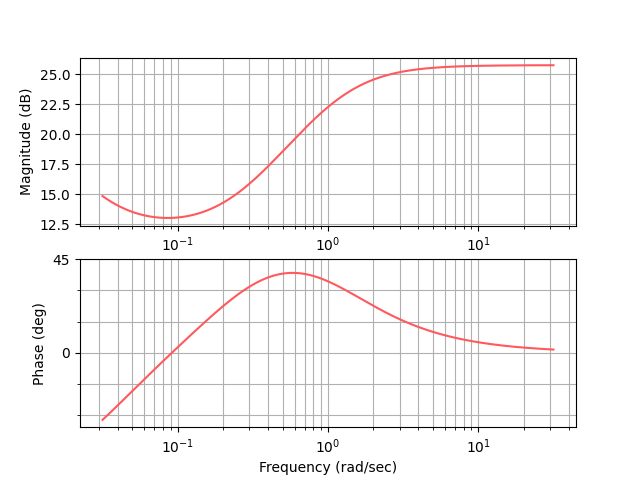

In [411]:
plt.figure()
G_ll_M, G_ll_φ, G_ll_ω = ct.bode_plot(G_ll,
                                      omega=np.logspace(-1.5, 1.5, 5001),
                                      color=cp['red'],
                                      dB=True)

#### 2.2. Função de transferência entre referência (r) e saída (c)

In [412]:
rc_tf_ll = ct.feedback(G_ll * L_0)
rc_tf_ll

TransferFunction(array([ 723.76338439, 1052.67166488, 4104.12496614, 2150.08364696,
       1295.57372497,  270.1401822 ,    6.99294208]), array([  37.2428    ,   88.2946521 , 1002.2816056 , 1231.69280636,
       3885.18117124, 1907.22237647, 1174.66252933,  269.77962844,
          6.99294208]))

Frequencias naturais, fatores de amortecimento e zeros em malha fechada:

In [413]:
ω_n_cl, ζ_cl, zeros_cl = rc_tf_ll.damp()
ω_n_cl

array([4.54594982, 4.54594982, 2.03410654, 2.03410654, 0.53135078,
       0.53135078, 0.26319187, 0.02955193])

In [414]:
ζ_cl

array([0.12719246, 0.12719246, 0.17724217, 0.17724217, 0.18872721,
       0.18872721, 1.        , 1.        ])

In [415]:
zeros_cl

array([-0.57821053+4.50902787j, -0.57821053-4.50902787j,
       -0.36052946+2.00190107j, -0.36052946-2.00190107j,
       -0.10028035+0.52180217j, -0.10028035-0.52180217j,
       -0.26319187+0.j        , -0.02955193+0.j        ])

Diagrama de Bode da função de transferência do sistema em malha fechada:

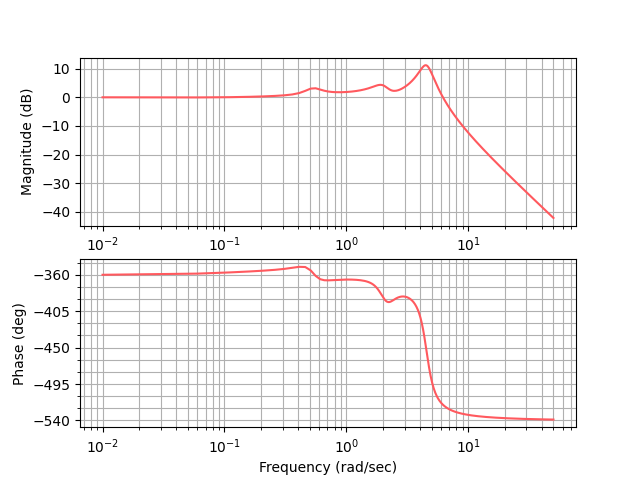

In [416]:
plt.figure()
rc_tf_M, rc_tf_φ, rc_tf_ω = ct.bode_plot(rc_tf_ll,
                                   omega=np.linspace(0.01, 50, 1001),
                                   color=cp['red'],
                                   dB=True)

#### 2.3. Função de transferência entre referência (r) e entrada de controle (u)

In [417]:
ru_tf_ll = ct.feedback(G_ll, L_0)
ru_tf_ll

TransferFunction(array([  723.76338439,  1064.01381528,  4633.05459362,  -474.62321605,
       -2736.70521846, -2638.16085244,  -556.93539451,   -14.40711184,
           0.        ]), array([  37.2428    ,   88.2946521 , 1002.2816056 , 1231.69280636,
       3885.18117124, 1907.22237647, 1174.66252933,  269.77962844,
          6.99294208]))

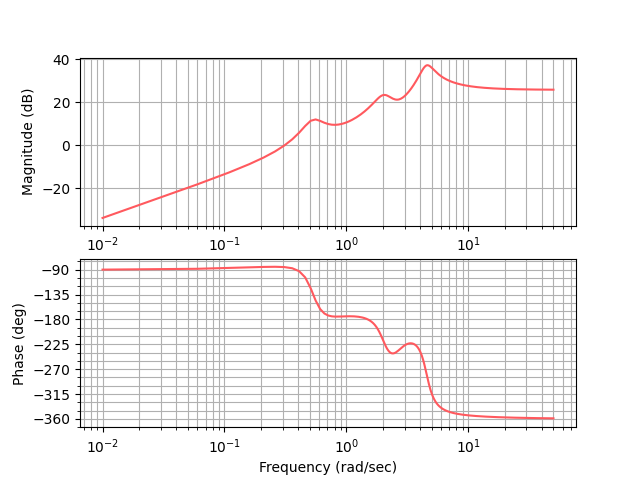

In [418]:
plt.figure()
ru_tf_M, ru_tf_φ, ru_tf_ω = ct.bode_plot(ru_tf_ll,
                                         omega=np.linspace(0.01, 50, 1001),
                                         color=cp['red'],
                                         dB=True)

#### 2.4. Resposta a degrau

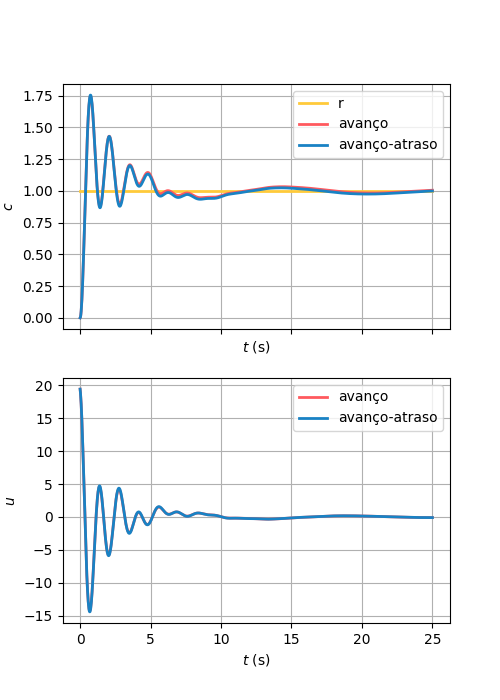

In [419]:
# simulação do sistema em MF
ts = np.linspace(0, 25, 1000)

t, y_l = ct.step_response(rc_tf_lead, ts)
t, u_l = ct.step_response(ru_tf_lead, ts)

t, y_ll = ct.step_response(rc_tf_ll, ts)
t, u_ll = ct.step_response(ru_tf_ll, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
state.plot(t, y_l,
           color=cp['red'], label=r'avanço', linewidth=2)
state.plot(t, y_ll,
           color=cp['blue'], label=r'avanço-atraso', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

control_input.plot(t, u_l,
           color=cp['red'], label=r'avanço', linewidth=2)
control_input.plot(t, u_ll,
                   color=cp['blue'], label=r'avanço-atraso', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 1.5. Resposta a rampa

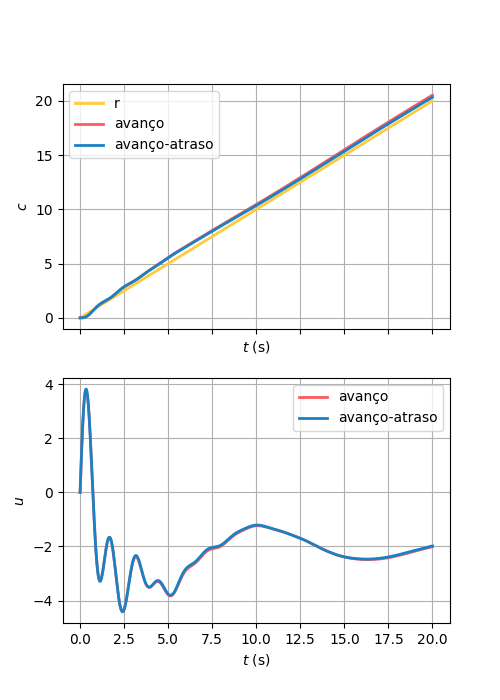

In [420]:
# simulação do sistema em MF
ts = np.linspace(0, 20, 2000)

t, y_l = ct.forced_response(rc_tf_lead, ts, U=ts)
t, u_l = ct.forced_response(ru_tf_lead, ts, U=ts)

t, y_ll = ct.forced_response(rc_tf_ll, ts, U=ts)
t, u_ll = ct.forced_response(ru_tf_ll, ts, U=ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, t, color=cp['yellow'], label='r', linewidth=2)
state.plot(t, y_l,
           color=cp['red'], label=r'avanço', linewidth=2)
state.plot(t, y_ll,
           color=cp['blue'], label=r'avanço-atraso', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

control_input.plot(t, u_l,
                   color=cp['red'], label=r'avanço', linewidth=2)
control_input.plot(t, u_ll,
                   color=cp['blue'], label=r'avanço-atraso', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()